In [1]:
import torch 
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
import warnings
from pd.nn.model import Conv

from pd.metric import amex_metric
from pd.data.loader import CustomerData, DataLoader
from pd.params import *
from pd.pred import pred_test_npy
from sklearn.model_selection import train_test_split


In [78]:
train_data = pd.read_parquet(DATADIR+"train_data.parquet")
train_labels = pd.read_csv(DATADIR+"train_labels.csv")
train_labels.set_index("customer_ID", inplace=True)


In [3]:
train_customers = train_data.customer_ID
train_count =  train_customers.value_counts()
train_c13 = train_count[train_count==13].index
train_data = train_data[train_data.customer_ID.isin(train_c13)]


In [81]:
a = train_data.groupby("customer_ID")[CATCOLS].agg(['count', 'last', 'nunique'])

In [87]:
a

B_30               B_38  \
                                                   count last nunique count   
customer_ID                                                                   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...    13    0       1    13   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...    13    0       1    13   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...    13    0       1    13   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...    13    0       1    13   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...    13    0       1    13   
...                                                  ...  ...     ...   ...   
ffff41c8a52833b56430603969b9ca48d208e7c192c6a40...    13    0       1    13   
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd...    13    0       2    13   
ffff9984b999fccb2b6127635ed0736dda94e544e67e026...    13    0       1    13   
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145...    13    0       1    13   
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eab...    13    0       1    13   

                                                                D_114       \
                                                   last nunique count last   
customer_ID                                                                  
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...    2       1    13    1   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...    2       1    13    1   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...    1       1    13    1   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...    2       1    13    1   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...    1       2    13    1   
...                                                 ...     ...   ...  ...   
ffff41c8a52833b56430603969b9ca48d208e7c192c6a40...    2       1    13    0   
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd...    7       2    13    1   
ffff9984b999fccb2b6127635ed0736dda94e544e67e026...    3       2    13    1   
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145...    3       1    13    1   
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eab...    3       1    13    1   

                                                           D_116  ...    D_63  \
                                                   nunique count  ... nunique   
customer_ID                                                       ...           
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...       1    13  ...       1   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...       1    13  ...       1   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...       2    13  ...       1   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...       1    13  ...       1   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...       1    13  ...       1   
...                                                    ...   ...  ...     ...   
ffff41c8a52833b56430603969b9ca48d208e7c192c6a40...       1    13  ...       1   
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd...       1    13  ...       1   
ffff9984b999fccb2b6127635ed0736dda94e544e67e026...       1    13  ...       1   
ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145...       2    13  ...       1   
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eab...       1    13  ...       1   

                                                    D_64               D_66  \
                                                   count last nunique count   
customer_ID                                                                   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...    13    0       1    13   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...    13    0       1    13   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...    13    2       1    13   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...    13    0       1    13   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...    13    0       1    13   
...                                                  ...  ...     ...   ...   
ffff41

In [85]:
for c in CATCOLS:
    if c in betterTransFeatsK79:
        print(c)

D_114
D_116
D_120
D_63
D_64
D_66
D_68


In [86]:
CATCOLS

['B_30',
 'B_38',
 'D_114',
 'D_116',
 'D_117',
 'D_120',
 'D_126',
 'D_63',
 'D_64',
 'D_66',
 'D_68']

In [65]:
c = "R_13"
d = train_data["R_13"]


/var/folders/t2/_nykd9tn43dfx142nv5r8l900000gn/T/ipykernel_26043/888282133.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  slope = 2.944/(col_info13[c]["q95"] - mid_point)


In [66]:
slope

inf

In [64]:
a = ((d - col_info13["R_13"][f"mean_{lb}_{ub}"])/col_info13["R_13"][f"std_{lb}_{ub}"])

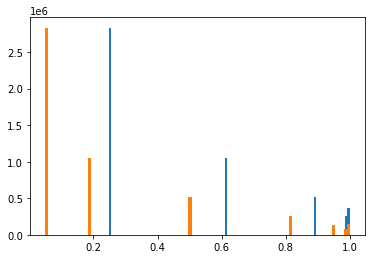

In [53]:
from scipy.stats import norm
_ = plt.hist(norm.cdf(a), bins=100)
_ = plt.hist(1/(1 + np.exp(slope*(mid_point - d))), bins=100)


In [4]:
    cols = featureCols

    if train_data is None:
        train_data = pd.read_parquet(TRAINDATA)
    if c13:
        train_customers = train_data.customer_ID
        train_count =  train_customers.value_counts()
        train_c13 = train_count[train_count==13].index
        train_data = train_data[train_data.customer_ID.isin(train_c13)]
        col_info_name = f"{col_info_name}13"

    for cat_col in CATCOLS:
        encoder = LabelEncoder()
        train_data[cat_col] = encoder.fit_transform(train_data[cat_col])
    
    col_info = {}
    for c in cols:
        col_info[c] = {}
        d = train_data[c]
        q2 = d.quantile(0.02)
        q98 = d.quantile(0.98)
        q5 = d.quantile(0.05)
        q95 = d.quantile(0.95)
        
        col_min_val = d.min()
        col_max_val = d.max()
        hist = np.histogram(d, range=[q2, q98], density=True, bins=100)
        
        col_info[c]["num_nan"] = 1 - d.dropna().shape[0]/d.shape[0]
        col_info[c]["q2"] = q2
        col_info[c]["q98"] = q98
        col_info[c]["q1"] = d.quantile(0.01)
        col_info[c]["q99"] = d.quantile(0.99)
        
        col_info[c]["min"] = col_min_val
        col_info[c]["max"] = col_max_val
        col_info[c]["mean"] = d.mean()
        col_info[c]["median"] = d.quantile(0.5)
        col_info[c]["hist"] = hist
        col_info[c]["max_prob_mass"] = hist[0].max()
        col_info[c]["num_nonzero_bins"] = np.count_nonzero(hist[0])
    

NameError: name 'c13' is not defined

In [20]:
nzs = []
dist_col_27 = []
for c in col_info.keys():
    nz = np.count_nonzero(col_info[c]["hist"][0])
    nzs.append(nz)
    if nz < 27:
        dist_col_27.append(c)

## Train with Conv Model

In [33]:
from pd.nn.train_utils import train_torch_model
model_name = "Conv_col27"
model = Conv(input_dim=91)
model = train_torch_model(model, train_loader, num_epochs=100, validation_data=validation_data, 
                            output_model_name=model_name)


0, BCE loss: 0.845, amex train: 0.013, val 0.000
0, BCE loss: 0.787, amex train: 0.105, val 0.000
0, BCE loss: 0.745, amex train: 0.132, val 0.000
0, BCE loss: 0.625, amex train: 0.154, val 0.000
0, BCE loss: 0.550, amex train: 0.191, val 0.000
0, BCE loss: 0.561, amex train: 0.204, val 0.000
0, BCE loss: 0.591, amex train: 0.222, val 0.000
0, BCE loss: 0.596, amex train: 0.246, val 0.000
0, BCE loss: 0.578, amex train: 0.242, val 0.000
0, BCE loss: 0.561, amex train: 0.240, val 0.000
0, BCE loss: 0.549, amex train: 0.241, val 0.000
0, BCE loss: 0.553, amex train: 0.244, val 0.000
0, BCE loss: 0.548, amex train: 0.245, val 0.000
0, BCE loss: 0.552, amex train: 0.251, val 0.000
0, BCE loss: 0.562, amex train: 0.257, val 0.000
0, BCE loss: 0.567, amex train: 0.255, val 0.000
0, BCE loss: 0.551, amex train: 0.259, val 0.000
0, BCE loss: 0.555, amex train: 0.257, val 0.000
0, BCE loss: 0.547, amex train: 0.265, val 0.000
0, BCE loss: 0.532, amex train: 0.269, val 0.000
0, BCE loss: 0.537, 

KeyboardInterrupt: 

## Train with aggregation over the features

### Mean aggregation

In [34]:
from bes.nn.es_module import ESModule
import torch 
import torch.nn as nn
import torch.nn.functional as F

class MLP(ESModule):

    def __init__(self, input_dim, hidden_dim=128,):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=input_dim, out_features=hidden_dim)
        self.nf1 = nn.LayerNorm([hidden_dim])
        self.fc2 = nn.Linear(in_features=hidden_dim, out_features=hidden_dim)
        self.nf2 = nn.LayerNorm([hidden_dim])
        self.fc3 = nn.Linear(in_features=hidden_dim, out_features=hidden_dim)
        self.nf3 = nn.LayerNorm([hidden_dim])
        self.fc4 = nn.Linear(in_features=hidden_dim, out_features=hidden_dim)
        self.nf4 = nn.LayerNorm([hidden_dim])
        self.fc5 = nn.Linear(in_features=hidden_dim, out_features=hidden_dim)
        self.nf5 = nn.LayerNorm([hidden_dim])
        
        self.fcout = nn.Linear(in_features=hidden_dim, out_features=1)
    
    def forward(self, h, return_featues=False):
        h = F.selu(self.fc1(h))
        r = self.nf1(h)
        h = F.selu(self.fc2(r))
        h = self.nf2(h)
        h = F.selu(self.fc3(h))
        r = self.nf3(h+r)
        h = F.selu(self.fc4(r))
        h = self.nf4(h)
        h = F.selu(self.fc5(h))
        h = self.nf5(h+r)
        if return_featues:
            return torch.sigmoid(self.fcout(h)), h
        
        return torch.sigmoid(self.fcout(h))



In [42]:
# take the sum of the of the data and normalize by the max vals 
X = train_data.sum(axis=1) 
for idx, c in enumerate(dist_col_27):
    X[:, idx] = X[:, idx]/col_info[c]["max"]

X = X/X.max(axis=0)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, train_labels, test_size=1/9, random_state=0, shuffle=True)
validation_data = (X_test, y_test)


In [60]:
train_dataset = CustomerData(X_train, train_labels=y_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)


In [61]:
model_name = "mlp_col27_sum"
model = MLP(input_dim=91)
model = train_torch_model(model, train_loader, num_epochs=100, validation_data=validation_data, 
                            output_model_name=model_name)


0, BCE loss: 0.660, amex train: -0.043, val 0.000
0, BCE loss: 0.618, amex train: 0.281, val 0.000
0, BCE loss: 0.586, amex train: 0.452, val 0.000
0, BCE loss: 0.493, amex train: 0.490, val 0.000
0, BCE loss: 0.449, amex train: 0.490, val 0.000
0, BCE loss: 0.468, amex train: 0.505, val 0.000
0, BCE loss: 0.453, amex train: 0.525, val 0.000
0, BCE loss: 0.414, amex train: 0.529, val 0.000
0, BCE loss: 0.385, amex train: 0.536, val 0.000
0, BCE loss: 0.383, amex train: 0.567, val 0.000
0, BCE loss: 0.388, amex train: 0.553, val 0.000
0, BCE loss: 0.377, amex train: 0.570, val 0.000
0, BCE loss: 0.348, amex train: 0.588, val 0.000
0, BCE loss: 0.355, amex train: 0.580, val 0.000
0, BCE loss: 0.361, amex train: 0.585, val 0.000
0, BCE loss: 0.373, amex train: 0.590, val 0.000
0, BCE loss: 0.348, amex train: 0.607, val 0.000
0, BCE loss: 0.345, amex train: 0.608, val 0.000
0, BCE loss: 0.343, amex train: 0.612, val 0.000
0, BCE loss: 0.347, amex train: 0.605, val 0.000
0, BCE loss: 0.346,

## Train a model with only c27 (extract a feature for them)

## Aggregate Model with pre-trained conv

In [62]:
model_name = "conv_90_780_18_5"
conv = Conv()
model_param = torch.load(OUTDIR+model_name)
conv.load_state_dict(model_param)


<All keys matched successfully>

In [64]:
pred, conv_feat =  conv(torch.as_tensor(np.load(OUTDIR+"train_data_all.npy"), dtype=torch.float32), return_featues=True)

In [13]:
3.40+11.70+13.10+1.69+6.10

35.99

In [4]:
X = np.load(OUTDIR+"agg_feat.npy")

In [5]:
train_labels = np.load(OUTDIR+"train_labels_all.npy")
    

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, train_labels, test_size=1/9, random_state=0, shuffle=True)
validation_data = (X_test, y_test)

train_dataset = CustomerData(X_train, train_labels=y_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)

    

In [6]:
from pd.nn.train_utils import train_torch_model
from bes.nn.es_module import ESModule
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [7]:

class MLP(ESModule):

    def __init__(self, input_dim, hidden_dim=128,):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=input_dim, out_features=hidden_dim)
        self.nf1 = nn.LayerNorm([hidden_dim])
        
        self.fcout = nn.Linear(in_features=hidden_dim, out_features=1)
    
    def forward(self, h, return_featues=False):
        h = F.selu(self.fc1(h))
        h = self.nf1(h)
        if return_featues:
            return torch.sigmoid(self.fcout(h)), h
        
        return torch.sigmoid(self.fcout(h))

In [8]:
class MLP(ESModule):

    def __init__(self, input_dim, hidden_dim=128,):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=input_dim, out_features=hidden_dim)
        self.nf1 = nn.LayerNorm([hidden_dim])
        self.fc2 = nn.Linear(in_features=hidden_dim, out_features=hidden_dim)
        self.nf2 = nn.LayerNorm([hidden_dim])
        self.fc3 = nn.Linear(in_features=hidden_dim, out_features=hidden_dim)
        self.nf3 = nn.LayerNorm([hidden_dim])
        self.fc4 = nn.Linear(in_features=hidden_dim, out_features=hidden_dim)
        self.nf4 = nn.LayerNorm([hidden_dim])
        self.fc5 = nn.Linear(in_features=hidden_dim, out_features=hidden_dim)
        self.nf5 = nn.LayerNorm([hidden_dim])
        
        self.fcout = nn.Linear(in_features=hidden_dim, out_features=1)
    
    def forward(self, h, return_featues=False):
        h = F.selu(self.fc1(h))
        r = self.nf1(h)
        h = F.selu(self.fc2(r))
        h = self.nf2(h)
        h = F.selu(self.fc3(h))
        r = self.nf3(h+r)
        h = F.selu(self.fc4(r))
        h = self.nf4(h)
        h = F.selu(self.fc5(h))
        h = self.nf5(h+r)
        if return_featues:
            return torch.sigmoid(self.fcout(h)), h
        
        return torch.sigmoid(self.fcout(h))


In [9]:
model = MLP(input_dim=X.shape[-1])
optimizer = torch.optim.Adam(model.parameters(),)
criterion = torch.nn.BCELoss()


for epoch in range(50): 
    for idx, (feat, clabel) in enumerate(train_loader):
        if len(feat.shape) == 4:  ## Reduce shape if its coming from a ratio version of the loader
            feat = feat.squeeze(dim=0)
            clabel = clabel.squeeze(dim=0)

        pred = model(feat)
        #weight = clabel.clone()
        #weight[weight==0] = 4
        #criterion.weight = weight
        loss = criterion(pred, clabel)
        
        # Update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        model_metric = amex_metric(clabel.detach().numpy(), pred.detach().numpy())
        val_metrix = 0
        if model_metric > 0.78:
            X_test, y_test = validation_data
            val_features = torch.as_tensor(X_test, dtype=torch.float32)
            val_pred = model(val_features)
            val_metrix = amex_metric(y_test, val_pred.detach().numpy())

        log_message = f"{epoch}, BCE loss: {loss.item():.3f}, amex train: {model_metric:.3f}, val {val_metrix:.3f}"
        print(log_message)    

0, BCE loss: 0.887, amex train: -0.070, val 0.000
0, BCE loss: 0.457, amex train: 0.719, val 0.000
0, BCE loss: 0.343, amex train: 0.772, val 0.000
0, BCE loss: 0.239, amex train: 0.791, val 0.772
0, BCE loss: 0.262, amex train: 0.791, val 0.772
0, BCE loss: 0.294, amex train: 0.772, val 0.000
0, BCE loss: 0.259, amex train: 0.785, val 0.775
0, BCE loss: 0.233, amex train: 0.783, val 0.774
0, BCE loss: 0.225, amex train: 0.789, val 0.774
0, BCE loss: 0.251, amex train: 0.769, val 0.000
0, BCE loss: 0.267, amex train: 0.774, val 0.000
0, BCE loss: 0.252, amex train: 0.781, val 0.776
0, BCE loss: 0.227, amex train: 0.793, val 0.776
0, BCE loss: 0.228, amex train: 0.781, val 0.777
0, BCE loss: 0.221, amex train: 0.801, val 0.777
0, BCE loss: 0.236, amex train: 0.784, val 0.777
0, BCE loss: 0.237, amex train: 0.791, val 0.777
0, BCE loss: 0.235, amex train: 0.778, val 0.000
0, BCE loss: 0.225, amex train: 0.792, val 0.777
0, BCE loss: 0.223, amex train: 0.786, val 0.777
0, BCE loss: 0.224,

In [10]:
import lightgbm as lgb


In [ ]:
params = {
        'objective': 'binary',
        'metric': "binary_logloss",
        'boosting': 'dart',
        'seed': 42,
        'num_leaves': 100,
        'learning_rate': 0.01,
        'feature_fraction': 0.20,
        'bagging_freq': 10,
        'bagging_fraction': 0.50,
        'n_jobs': -1,
        'lambda_l2': 2,
        'min_data_in_leaf': 40
        }

In [ ]:
val_pred = model.predict(X_test)
amex_metric(y_test, val_pred)
        

In [ ]:
def train_and_evaluate(train, test):
    # Label encode categorical features
    cat_features = [
        "B_30",
        "B_38",
        "D_114",
        "D_116",
        "D_117",
        "D_120",
        "D_126",
        "D_63",
        "D_64",
        "D_66",
        "D_68"
    ]
    cat_features = [f"{cf}_last" for cf in cat_features]
    for cat_col in cat_features:
        encoder = LabelEncoder()
        train[cat_col] = encoder.fit_transform(train[cat_col])
        test[cat_col] = encoder.transform(test[cat_col])
    # Round last float features to 2 decimal place
    num_cols = list(train.dtypes[(train.dtypes == 'float32') | (train.dtypes == 'float64')].index)
    num_cols = [col for col in num_cols if 'last' in col]
    for col in num_cols:
        train[col + '_round2'] = train[col].round(2)
        test[col + '_round2'] = test[col].round(2)
    # Get feature list
    features = [col for col in train.columns if col not in ['customer_ID', CFG.target]]
    params = {
        'objective': 'binary',
        'metric': "binary_logloss",
        'boosting': 'dart',
        'seed': 42,
        'num_leaves': 100,
        'learning_rate': 0.01,
        'feature_fraction': 0.20,
        'bagging_freq': 10,
        'bagging_fraction': 0.50,
        'n_jobs': -1,
        'lambda_l2': 2,
        'min_data_in_leaf': 40
        }
    # Create a numpy array to store test predictions
    test_predictions = np.zeros(len(test))
    # Create a numpy array to store out of folds predictions
    oof_predictions = np.zeros(len(train))
    kfold = StratifiedKFold(n_splits=1, shuffle=True, random_state=0)
    for fold, (trn_ind, val_ind) in enumerate(kfold.split(train, train[CFG.target])):
        print(' ')
        print('-'*50)
        print(f'Training fold {fold} with {len(features)} features...')
        x_train, x_val = train[features].iloc[trn_ind], train[features].iloc[val_ind]
        y_train, y_val = train[CFG.target].iloc[trn_ind], train[CFG.target].iloc[val_ind]
        
        lgb_train = lgb.Dataset(x_train, y_train, categorical_feature = cat_features)
        lgb_valid = lgb.Dataset(x_val, y_val, categorical_feature = cat_features)
        model = lgb.train(
            params = params,
            train_set = lgb_train,
            num_boost_round = 10500,
            valid_sets = [lgb_train, lgb_valid],
            early_stopping_rounds = 100,
            verbose_eval = 500,
            feval = lgb_amex_metric
            )
        # Save best model
        joblib.dump(model, f'/content/drive/MyDrive/Amex/Models/lgbm_fold{fold}_seed{CFG.seed}.pkl')
        # Predict validation
        val_pred = model.predict(x_val)
        # Add to out of folds array
        oof_predictions[val_ind] = val_pred
        # Predict the test set
        test_pred = model.predict(test[features])
        test_predictions += test_pred / CFG.n_folds
        # Compute fold metric
        score = amex_metric(y_val, val_pred)
        print(f'Our fold {fold} CV score is {score}')
        del x_train, x_val, y_train, y_val, lgb_train, lgb_valid
        gc.collect()
    # Compute out of folds metric
    score = amex_metric(train[CFG.target], oof_predictions)
    print(f'Our out of folds CV score is {score}')
    # Create a dataframe to store out of folds predictions
    oof_df = pd.DataFrame({'customer_ID': train['customer_ID'], 'target': train[CFG.target], 'prediction': oof_predictions})
    oof_df.to_csv(f'/content/drive/MyDrive/Amex/OOF/oof_lgbm_baseline_{CFG.n_folds}fold_seed{CFG.seed}.csv', index = False)
    # Create a dataframe to store test prediction
    test_df = pd.DataFrame({'customer_ID': test['customer_ID'], 'prediction': test_predictions})
    test_df.to_csv(f'/content/drive/MyDrive/Amex/Predictions/test_lgbm_baseline_{CFG.n_folds}fold_seed{CFG.seed}.csv', index = False)
    